In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
pd.set_option('display.max_rows', 160)

data_dir = Path('data')
data = Path('survey-results-public.csv')

df = pd.read_csv(data_dir / data)
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial EDA on the dataset

In [2]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"# of rows: {num_rows}, # of cols: {num_cols}")

# of rows: 51392, # of cols: 154


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 154 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    Respondent                        int64  
 1    Professional                      object 
 2    ProgramHobby                      object 
 3    Country                           object 
 4    University                        object 
 5    EmploymentStatus                  object 
 6    FormalEducation                   object 
 7    MajorUndergrad                    object 
 8    HomeRemote                        object 
 9    CompanySize                       object 
 10   CompanyType                       object 
 11   YearsProgram                      object 
 12   YearsCodedJob                     object 
 13   YearsCodedJobPast                 object 
 14   DeveloperType                     object 
 15   WebDeveloperType                  object 
 16   MobileDeveloperType 

In [4]:
df.isnull().mean()

Respondent                          0.000000
Professional                        0.000000
ProgramHobby                        0.000000
Country                             0.000000
University                          0.000000
EmploymentStatus                    0.000000
FormalEducation                     0.000000
MajorUndergrad                      0.166388
HomeRemote                          0.143680
CompanySize                         0.242645
CompanyType                         0.244571
YearsProgram                        0.004806
YearsCodedJob                       0.204351
YearsCodedJobPast                   0.981048
DeveloperType                       0.297070
WebDeveloperType                    0.791874
MobileDeveloperType                 0.969781
NonDeveloperType                    0.904849
CareerSatisfaction                  0.169229
JobSatisfaction                     0.214352
ExCoderReturn                       0.982040
ExCoderNotForMe                     0.982079
ExCoderBal

# 1. Is there any relationship between Programming Language and Salary or Job Satisfaction?

In [95]:
target_columns = ['CareerSatisfaction', 'JobSatisfaction', 'HaveWorkedLanguage', 'WantWorkLanguage','Salary']
tdf = df[df['Professional'] == 'Professional developer']
tdf = df[target_columns]
tdf.head()

,CareerSatisfaction,JobSatisfaction,HaveWorkedLanguage,WantWorkLanguage,Salary
0,NaN,NaN,Swift,Swift,NaN
1,NaN,NaN,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL,NaN
2,8.0,9.0,Java; PHP; Python,C; Python; Rust,113750.0
3,6.0,3.0,Matlab; Python; R; SQL,Matlab; Python; R; SQL,NaN
4,6.0,8.0,NaN,NaN,NaN


In [96]:
tdf['HaveWorkedLanguage'].value_counts()

C#; JavaScript; SQL                                                                                       1276
JavaScript; PHP; SQL                                                                                      1143
Java                                                                                                       913
JavaScript                                                                                                 807
JavaScript; PHP                                                                                            662
                                                                                                          ... 
C; C++; C#; F#; JavaScript; Python                                                                           1
Assembly; C; C++; Java; JavaScript; PHP; Python; Scala                                                       1
Java; PHP; Python; Swift                                                                                     1
A

In [97]:
import itertools

languages = pd.Series(itertools.chain(*[x.split('; ') for x in tdf['HaveWorkedLanguage'] if isinstance(x, str)]))
language_counts = languages.value_counts()
language_counts

JavaScript        22875
SQL               18754
Java              14524
C#                12476
Python            11704
PHP               10290
C++                8155
C                  6974
TypeScript         3488
Ruby               3324
Swift              2368
Objective-C        2349
VB.NET             2273
Assembly           1823
R                  1634
Perl               1585
VBA                1574
Matlab             1569
Go                 1557
Scala              1309
Groovy             1193
CoffeeScript       1192
Visual Basic 6     1071
Lua                1039
Haskell             649
F#                  457
Rust                416
Clojure             391
Elixir              380
Smalltalk           327
Erlang              281
Common Lisp         273
Dart                145
Julia               138
Hack                107
dtype: int64

In [169]:
language_rank = language_counts.rank(ascending=False)
language_rank

JavaScript         1.0
SQL                2.0
Java               3.0
C#                 4.0
Python             5.0
PHP                6.0
C++                7.0
C                  8.0
TypeScript         9.0
Ruby              10.0
Swift             11.0
Objective-C       12.0
VB.NET            13.0
Assembly          14.0
R                 15.0
Perl              16.0
VBA               17.0
Matlab            18.0
Go                19.0
Scala             20.0
Groovy            21.0
CoffeeScript      22.0
Visual Basic 6    23.0
Lua               24.0
Haskell           25.0
F#                26.0
Rust              27.0
Clojure           28.0
Elixir            29.0
Smalltalk         30.0
Erlang            31.0
Common Lisp       32.0
Dart              33.0
Julia             34.0
Hack              35.0
dtype: float64

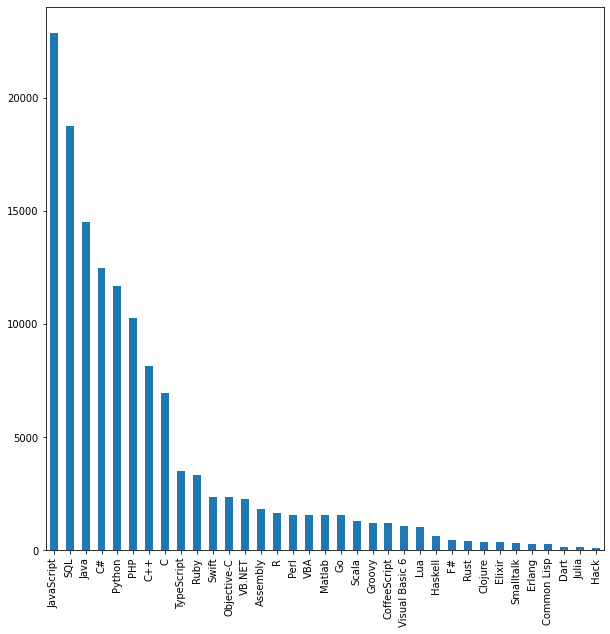

In [98]:
plt.figure(figsize=(10,10))
language_counts.plot(kind='bar');

In [116]:
tdf_satisf = tdf.dropna(subset=['CareerSatisfaction', 'JobSatisfaction'])
tdf_satisf

,CareerSatisfaction,JobSatisfaction,HaveWorkedLanguage,WantWorkLanguage,Salary
2,8.0,9.0,Java; PHP; Python,C; Python; Rust,113750.0
3,6.0,3.0,Matlab; Python; R; SQL,Matlab; Python; R; SQL,NaN
4,6.0,8.0,NaN,NaN,NaN
6,7.0,6.0,Matlab; Python,JavaScript; Julia; Matlab; Python; R; SQL,NaN
7,7.0,7.0,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Clojure; Elixir; Haskell; Scala,NaN
...,...,...,...,...,...
51386,7.0,4.0,C++; C#; Java; JavaScript; PHP; SQL,C++; C#; Go; Java; JavaScript; PHP,NaN
51387,7.0,3.0,C#; JavaScript; Python; SQL; VB.NET; VBA,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,58000.0
51389,10.0,10.0,NaN,NaN,NaN
51390,6.0,7.0,JavaScript; PHP; Swift,Clojure; Erlang; Haskell,40000.0


In [146]:
expand_df = pd.DataFrame(columns = ['CareerSatisfaction', 'JobSatisfaction', 'Language'])

for idx, row in tdf_satisf.iterrows():
    career = row['CareerSatisfaction']
    job = row['JobSatisfaction']
    if isinstance(row['HaveWorkedLanguage'], str):
        lang = row['HaveWorkedLanguage'].split('; ')
        for l in lang:
            temp = {'CareerSatisfaction': [career],
                    'JobSatisfaction': [job], 
                    'Language': [l]}
            expand_df = expand_df.append(pd.DataFrame(temp))

In [165]:
career_mean = expand_df.groupby('Language').mean()['CareerSatisfaction'].sort_values(ascending=False)
job_mean = expand_df.groupby('Language').mean()['JobSatisfaction'].sort_values(ascending=False)

In [166]:
career_rank = career_mean.rank(ascending=False)
job_rank = job_mean.rank(ascending=False)

In [176]:
((job_rank + language_rank) / 2).sort_values()

TypeScript         6.5
Objective-C        7.0
Swift              8.5
Ruby               9.5
Python             9.5
JavaScript        10.5
CoffeeScript      12.5
C#                13.5
Scala             13.5
C++               14.0
Assembly          14.5
Go                14.5
SQL               14.5
PHP               15.5
R                 15.5
Smalltalk         15.5
C                 16.0
Java              16.5
Perl              16.5
Groovy            16.5
Lua               17.5
Elixir            18.5
Hack              20.0
Matlab            22.0
VB.NET            23.0
Julia             23.5
Clojure           23.5
F#                24.0
Erlang            24.5
VBA               24.5
Rust              27.5
Haskell           28.0
Visual Basic 6    28.5
Dart              31.0
Common Lisp       33.5
dtype: float64

In [177]:
tdf_salary = tdf.dropna(subset=['Salary'])
tdf_salary

,CareerSatisfaction,JobSatisfaction,HaveWorkedLanguage,WantWorkLanguage,Salary
2,8.0,9.0,Java; PHP; Python,C; Python; Rust,113750.000000
14,8.0,8.0,Assembly; C; C++,Assembly; C; C++; Python,100000.000000
17,9.0,8.0,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,Assembly; Clojure; Go; JavaScript; Rust; Swift...,130000.000000
18,5.0,3.0,NaN,NaN,82500.000000
22,8.0,9.0,Java,Java; Scala; Swift,100764.000000
...,...,...,...,...,...
51371,7.0,7.0,Go; JavaScript; Python,Elixir; JavaScript; Python; Scala,74193.548387
51378,10.0,10.0,JavaScript; Objective-C; Python; Swift,CoffeeScript; JavaScript; Python; Ruby,107526.881720
51382,9.0,5.0,C#; JavaScript; TypeScript,JavaScript,32258.064516
51387,7.0,3.0,C#; JavaScript; Python; SQL; VB.NET; VBA,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,58000.000000


In [178]:
salary_df = pd.DataFrame(columns = ['Language', 'Salary'])

for idx, row in tdf_salary.iterrows():
    salary = row['Salary']
    if isinstance(row['HaveWorkedLanguage'], str):
        lang = row['HaveWorkedLanguage'].split('; ')
        for l in lang:
            temp = {'Salary': [salary], 
                    'Language': [l]}
            salary_df = salary_df.append(pd.DataFrame(temp))

In [181]:
salary_mean = salary_df.groupby('Language').mean()['Salary'].sort_values(ascending=False)
salary_rank = salary_mean.rank(ascending=False)

In [183]:
salary_rank

Language
Clojure            1.0
Smalltalk          2.0
Rust               3.0
Go                 4.0
Hack               5.0
Perl               6.0
F#                 7.0
Scala              8.0
Erlang             9.0
Groovy            10.0
Ruby              11.0
Elixir            12.0
R                 13.0
CoffeeScript      14.0
Julia             15.0
Common Lisp       16.0
Objective-C       17.0
Python            18.0
Swift             19.0
Haskell           20.0
Lua               21.0
TypeScript        22.0
C++               23.0
C#                24.0
C                 25.0
JavaScript        26.0
Matlab            27.0
SQL               28.0
Java              29.0
Assembly          30.0
VBA               31.0
Dart              32.0
VB.NET            33.0
Visual Basic 6    34.0
PHP               35.0
Name: Salary, dtype: float64

In [186]:
((job_rank + career_rank + language_rank + salary_rank) / 4).sort_values()

Objective-C        8.00
TypeScript         9.25
Ruby               9.25
Go                 9.50
Swift              9.75
Smalltalk          9.75
CoffeeScript      10.75
Scala             10.75
Python            12.75
Groovy            13.00
Perl              13.50
JavaScript        14.75
Elixir            15.00
C#                16.00
Clojure           16.00
Hack              16.00
R                 16.50
Assembly          17.25
Lua               18.25
F#                18.25
C++               18.75
SQL               19.50
Java              20.50
C                 20.75
PHP               22.25
Julia             22.50
Erlang            22.75
Rust              23.00
Matlab            25.50
Haskell           26.50
VB.NET            26.50
VBA               28.00
Common Lisp       29.50
Dart              29.75
Visual Basic 6    30.00
dtype: float64

# RemoteWork

In [187]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
df['HomeRemote'].value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

In [191]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 154 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    Respondent                        int64  
 1    Professional                      object 
 2    ProgramHobby                      object 
 3    Country                           object 
 4    University                        object 
 5    EmploymentStatus                  object 
 6    FormalEducation                   object 
 7    MajorUndergrad                    object 
 8    HomeRemote                        object 
 9    CompanySize                       object 
 10   CompanyType                       object 
 11   YearsProgram                      object 
 12   YearsCodedJob                     object 
 13   YearsCodedJobPast                 object 
 14   DeveloperType                     object 
 15   WebDeveloperType                  object 
 16   MobileDeveloperType 

In [224]:
target = ['HomeRemote', 'CompanyType', 'CompanySize', 'JobSatisfaction']

In [225]:
rm_df = df.dropna(subset=['JobSatisfaction'])[target]
rm_df

,HomeRemote,CompanyType,CompanySize,JobSatisfaction
2,"Less than half the time, but at least one day ...",Publicly-traded corporation,"10,000 or more employees",9.0
3,"Less than half the time, but at least one day ...",Non-profit/non-governmental organization or pr...,"10,000 or more employees",3.0
4,Never,"Privately-held limited company, not in startup...",10 to 19 employees,8.0
6,"Less than half the time, but at least one day ...",Government agency or public school/university,20 to 99 employees,6.0
7,All or almost all the time (I'm full-time remote),Pre-series A startup,Fewer than 10 employees,7.0
...,...,...,...,...
51386,It's complicated,"Privately-held limited company, not in startup...",100 to 499 employees,4.0
51387,A few days each month,I don't know,100 to 499 employees,3.0
51389,"Less than half the time, but at least one day ...",I prefer not to answer,10 to 19 employees,10.0
51390,Never,"Sole proprietorship or partnership, not in sta...",Fewer than 10 employees,7.0


In [226]:
rm_df[['HomeRemote', 'JobSatisfaction']].groupby('HomeRemote').mean()['JobSatisfaction'].sort_values(ascending=False)

HomeRemote
All or almost all the time (I'm full-time remote)          7.388430
Less than half the time, but at least one day each week    7.120125
A few days each month                                      7.077509
About half the time                                        6.973702
More than half, but not all, the time                      6.953184
It's complicated                                           6.840830
Never                                                      6.632502
Name: JobSatisfaction, dtype: float64

In [227]:
rm_df[['CompanySize', 'JobSatisfaction']].groupby('CompanySize').mean()['JobSatisfaction'].sort_values(ascending=False)

CompanySize
I prefer not to answer      7.280835
Fewer than 10 employees     7.008749
10 to 19 employees          7.000799
20 to 99 employees          6.949092
100 to 499 employees        6.937089
1,000 to 4,999 employees    6.884509
500 to 999 employees        6.883661
I don't know                6.842679
10,000 or more employees    6.810345
5,000 to 9,999 employees    6.748153
Name: JobSatisfaction, dtype: float64

In [228]:
rm_df[['CompanyType', 'JobSatisfaction']].groupby('CompanyType').mean()['JobSatisfaction'].sort_values(ascending=False)

CompanyType
Venture-funded startup                                                   7.377150
Pre-series A startup                                                     7.273109
I prefer not to answer                                                   7.097690
Non-profit/non-governmental organization or private school/university    7.005613
Publicly-traded corporation                                              6.927360
Something else                                                           6.897959
Government agency or public school/university                            6.894027
I don't know                                                             6.879274
Sole proprietorship or partnership, not in startup mode                  6.856930
Privately-held limited company, not in startup mode                      6.843209
State-owned company                                                      6.528333
Name: JobSatisfaction, dtype: float64

## Satisfacction

    직장인을 대상으로, Salary 를 결정하는데 중요한 요소 (Feature) 를 찾아본다.
    
    전처리:
        1. Missing Value
            Delete
                Delete columns with more than 80% of null values
                Delete rows with more than 80% of null values
            Impute
        2. Ordinary Encoding
        3. Chi2 Analysis

### Delete Row/Column with missing values

In [301]:
def get_null_row(df, thres=0.9):
    return df.index[df.isnull().mean(axis=1) > thres].tolist()

def get_null_col(df, thres=0.9):
    temp_df = df.isnull().mean()
    return temp_df[temp_df > thres].index.tolist()

In [308]:
new_df = df.dropna(subset=['Salary'], axis=0)
new_df = new_df.drop(get_null_col(new_df, 0.8), axis=1)
new_df = new_df.drop(get_null_row(new_df, 0.8), axis=0)
new_df.reset_index(drop=True, inplace=True)

### Impute Row/Column missing values 

In [310]:
con_df = new_df.select_dtypes(include=['int', 'float'])
con_df

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary
0,8.0,9.0,NaN,8.0,113750.000000
1,8.0,8.0,NaN,8.0,100000.000000
2,9.0,8.0,NaN,8.0,130000.000000
3,5.0,3.0,NaN,NaN,82500.000000
4,8.0,9.0,NaN,8.0,100764.000000
...,...,...,...,...,...
12743,7.0,7.0,NaN,8.0,74193.548387
12744,10.0,10.0,NaN,10.0,107526.881720
12745,9.0,5.0,0.0,7.0,32258.064516
12746,7.0,3.0,5.0,9.0,58000.000000


In [311]:
fill_null = lambda col: col.fillna(col.mean())
con_df = con_df.apply(fill_null, axis=0)
con_df

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary
0,8.0,9.0,2.637645,8.000000,113750.000000
1,8.0,8.0,2.637645,8.000000,100000.000000
2,9.0,8.0,2.637645,8.000000,130000.000000
3,5.0,3.0,2.637645,8.511858,82500.000000
4,8.0,9.0,2.637645,8.000000,100764.000000
...,...,...,...,...,...
12743,7.0,7.0,2.637645,8.000000,74193.548387
12744,10.0,10.0,2.637645,10.000000,107526.881720
12745,9.0,5.0,0.000000,7.000000,32258.064516
12746,7.0,3.0,5.000000,9.000000,58000.000000


In [312]:
cat_df = new_df.select_dtypes(include=['object'])
cat_df

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
1,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",Publicly-traded corporation,...,Strongly agree,Agree,Disagree,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree
2,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",Publicly-traded corporation,...,Strongly agree,Strongly agree,Disagree,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree
3,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",Publicly-traded corporation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,"Privately-held limited company, not in startup...",...,Strongly agree,Agree,Somewhat agree,Male,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12743,Professional developer,No,Netherlands,No,Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Agree,Strongly agree,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Strongly disagree,Agree
12744,Professional developer,"Yes, I contribute to open source projects",Cyprus,No,Employed part-time,Secondary school,NaN,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Non-profit/non-governmental organization or pr...,...,Strongly agree,Strongly disagree,Strongly disagree,Male,A doctoral degree,NaN,Somewhat agree,Strongly agree,Strongly disagree,Strongly agree
12745,Professional developer,"Yes, I program as a hobby",France,No,Employed full-time,Master's degree,Computer science or software engineering,Never,100 to 499 employees,I don't know,...,Strongly agree,Strongly agree,Disagree,Male,A master's degree,White or of European descent,Agree,Agree,Disagree,Somewhat agree
12746,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,I don't know,...,Agree,Somewhat agree,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree


In [313]:
fill_null = lambda col: col.fillna('Null')
cat_df = cat_df.apply(fill_null, axis=0)
cat_df

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
1,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",Publicly-traded corporation,...,Strongly agree,Agree,Disagree,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree
2,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",Publicly-traded corporation,...,Strongly agree,Strongly agree,Disagree,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree
3,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",Publicly-traded corporation,...,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null
4,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,"Privately-held limited company, not in startup...",...,Strongly agree,Agree,Somewhat agree,Male,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12743,Professional developer,No,Netherlands,No,Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Agree,Strongly agree,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Strongly disagree,Agree
12744,Professional developer,"Yes, I contribute to open source projects",Cyprus,No,Employed part-time,Secondary school,Null,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Non-profit/non-governmental organization or pr...,...,Strongly agree,Strongly disagree,Strongly disagree,Male,A doctoral degree,Null,Somewhat agree,Strongly agree,Strongly disagree,Strongly agree
12745,Professional developer,"Yes, I program as a hobby",France,No,Employed full-time,Master's degree,Computer science or software engineering,Never,100 to 499 employees,I don't know,...,Strongly agree,Strongly agree,Disagree,Male,A master's degree,White or of European descent,Agree,Agree,Disagree,Somewhat agree
12746,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,I don't know,...,Agree,Somewhat agree,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree


### Convert Category column to Ordinal column

In [314]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(cat_df)
cat_df_encoding = oe.transform(cat_df)
cat_df_encoding = pd.DataFrame(cat_df_encoding, columns=cat_df.columns)
cat_df_encoding

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,0.0,3.0,125.0,1.0,0.0,0.0,8.0,4.0,2.0,7.0,...,0.0,0.0,1.0,6.0,3.0,52.0,3.0,0.0,1.0,0.0
1,0.0,2.0,125.0,1.0,0.0,6.0,6.0,2.0,5.0,7.0,...,4.0,0.0,1.0,6.0,4.0,52.0,3.0,0.0,1.0,0.0
2,0.0,3.0,126.0,3.0,0.0,0.0,8.0,2.0,0.0,7.0,...,4.0,4.0,1.0,6.0,2.0,48.0,1.0,0.0,1.0,0.0
3,0.0,2.0,126.0,1.0,0.0,0.0,8.0,0.0,2.0,7.0,...,2.0,2.0,2.0,16.0,8.0,49.0,2.0,2.0,2.0,2.0
4,0.0,0.0,55.0,1.0,0.0,0.0,6.0,0.0,6.0,6.0,...,4.0,0.0,3.0,6.0,0.0,52.0,4.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12743,0.0,0.0,83.0,1.0,0.0,0.0,8.0,2.0,7.0,5.0,...,0.0,4.0,1.0,6.0,0.0,52.0,1.0,0.0,5.0,0.0
12744,0.0,1.0,28.0,1.0,1.0,7.0,14.0,2.0,7.0,3.0,...,4.0,5.0,5.0,6.0,1.0,49.0,3.0,4.0,5.0,4.0
12745,0.0,2.0,37.0,1.0,0.0,4.0,8.0,6.0,3.0,1.0,...,4.0,4.0,1.0,6.0,2.0,52.0,0.0,0.0,1.0,3.0
12746,0.0,2.0,126.0,1.0,0.0,0.0,5.0,0.0,3.0,1.0,...,0.0,3.0,1.0,6.0,1.0,24.0,1.0,0.0,5.0,4.0


### Merge Con_df with Cat_df

In [315]:
new_df = pd.concat([con_df, cat_df_encoding], axis=1)
new_df

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,Professional,ProgramHobby,Country,University,EmploymentStatus,...,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
0,8.0,9.0,2.637645,8.000000,113750.000000,0.0,3.0,125.0,1.0,0.0,...,0.0,0.0,1.0,6.0,3.0,52.0,3.0,0.0,1.0,0.0
1,8.0,8.0,2.637645,8.000000,100000.000000,0.0,2.0,125.0,1.0,0.0,...,4.0,0.0,1.0,6.0,4.0,52.0,3.0,0.0,1.0,0.0
2,9.0,8.0,2.637645,8.000000,130000.000000,0.0,3.0,126.0,3.0,0.0,...,4.0,4.0,1.0,6.0,2.0,48.0,1.0,0.0,1.0,0.0
3,5.0,3.0,2.637645,8.511858,82500.000000,0.0,2.0,126.0,1.0,0.0,...,2.0,2.0,2.0,16.0,8.0,49.0,2.0,2.0,2.0,2.0
4,8.0,9.0,2.637645,8.000000,100764.000000,0.0,0.0,55.0,1.0,0.0,...,4.0,0.0,3.0,6.0,0.0,52.0,4.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12743,7.0,7.0,2.637645,8.000000,74193.548387,0.0,0.0,83.0,1.0,0.0,...,0.0,4.0,1.0,6.0,0.0,52.0,1.0,0.0,5.0,0.0
12744,10.0,10.0,2.637645,10.000000,107526.881720,0.0,1.0,28.0,1.0,1.0,...,4.0,5.0,5.0,6.0,1.0,49.0,3.0,4.0,5.0,4.0
12745,9.0,5.0,0.000000,7.000000,32258.064516,0.0,2.0,37.0,1.0,0.0,...,4.0,4.0,1.0,6.0,2.0,52.0,0.0,0.0,1.0,3.0
12746,7.0,3.0,5.000000,9.000000,58000.000000,0.0,2.0,126.0,1.0,0.0,...,0.0,3.0,1.0,6.0,1.0,24.0,1.0,0.0,5.0,4.0


In [316]:
target = 'Salary'
features = [x for x in new_df.columns if x != target]

x_data = new_df[features]
y_data = new_df[target]

In [372]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x_data, y_data)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x00000200156B0310>)

In [373]:
fs_score = {}
for i, s in enumerate(fs.scores_):
    fs_score[x_data.columns[i]] = s
fs_score = {k:v for k,v in sorted(fs_score.items(), key=lambda item: item[1], reverse=True)}
fs_score

{'Country': 1.1918590513396299,
 'Currency': 1.1640439844999397,
 'YearsCodedJob': 0.17676630624403034,
 'YearsProgram': 0.1522419784260025,
 'Race': 0.12312421141585395,
 'JobProfile': 0.0873646898436391,
 'CompanyType': 0.06935517003353064,
 'PronounceGIF': 0.0640864380089794,
 'FormalEducation': 0.06389820061742935,
 'ImportantBenefits': 0.05601426851247382,
 'University': 0.055859164730530875,
 'Overpaid': 0.048294356388693505,
 'HaveWorkedLanguage': 0.047010896959035264,
 'HighestEducationParents': 0.04425795730772997,
 'MajorUndergrad': 0.042722705031106756,
 'CompanySize': 0.04013767514521094,
 'TabsSpaces': 0.038957467778274246,
 'WantWorkDatabase': 0.03890201263313475,
 'IDE': 0.03740146796610677,
 'MetricAssess': 0.03643547235503064,
 'WorkStart': 0.03321759847423644,
 'HomeRemote': 0.032113155488748824,
 'StackOverflowDevices': 0.03181072905442406,
 'HaveWorkedPlatform': 0.0308677885234534,
 'RightWrongWay': 0.030229057591363073,
 'SurveyLong': 0.029793316480033916,
 'Import

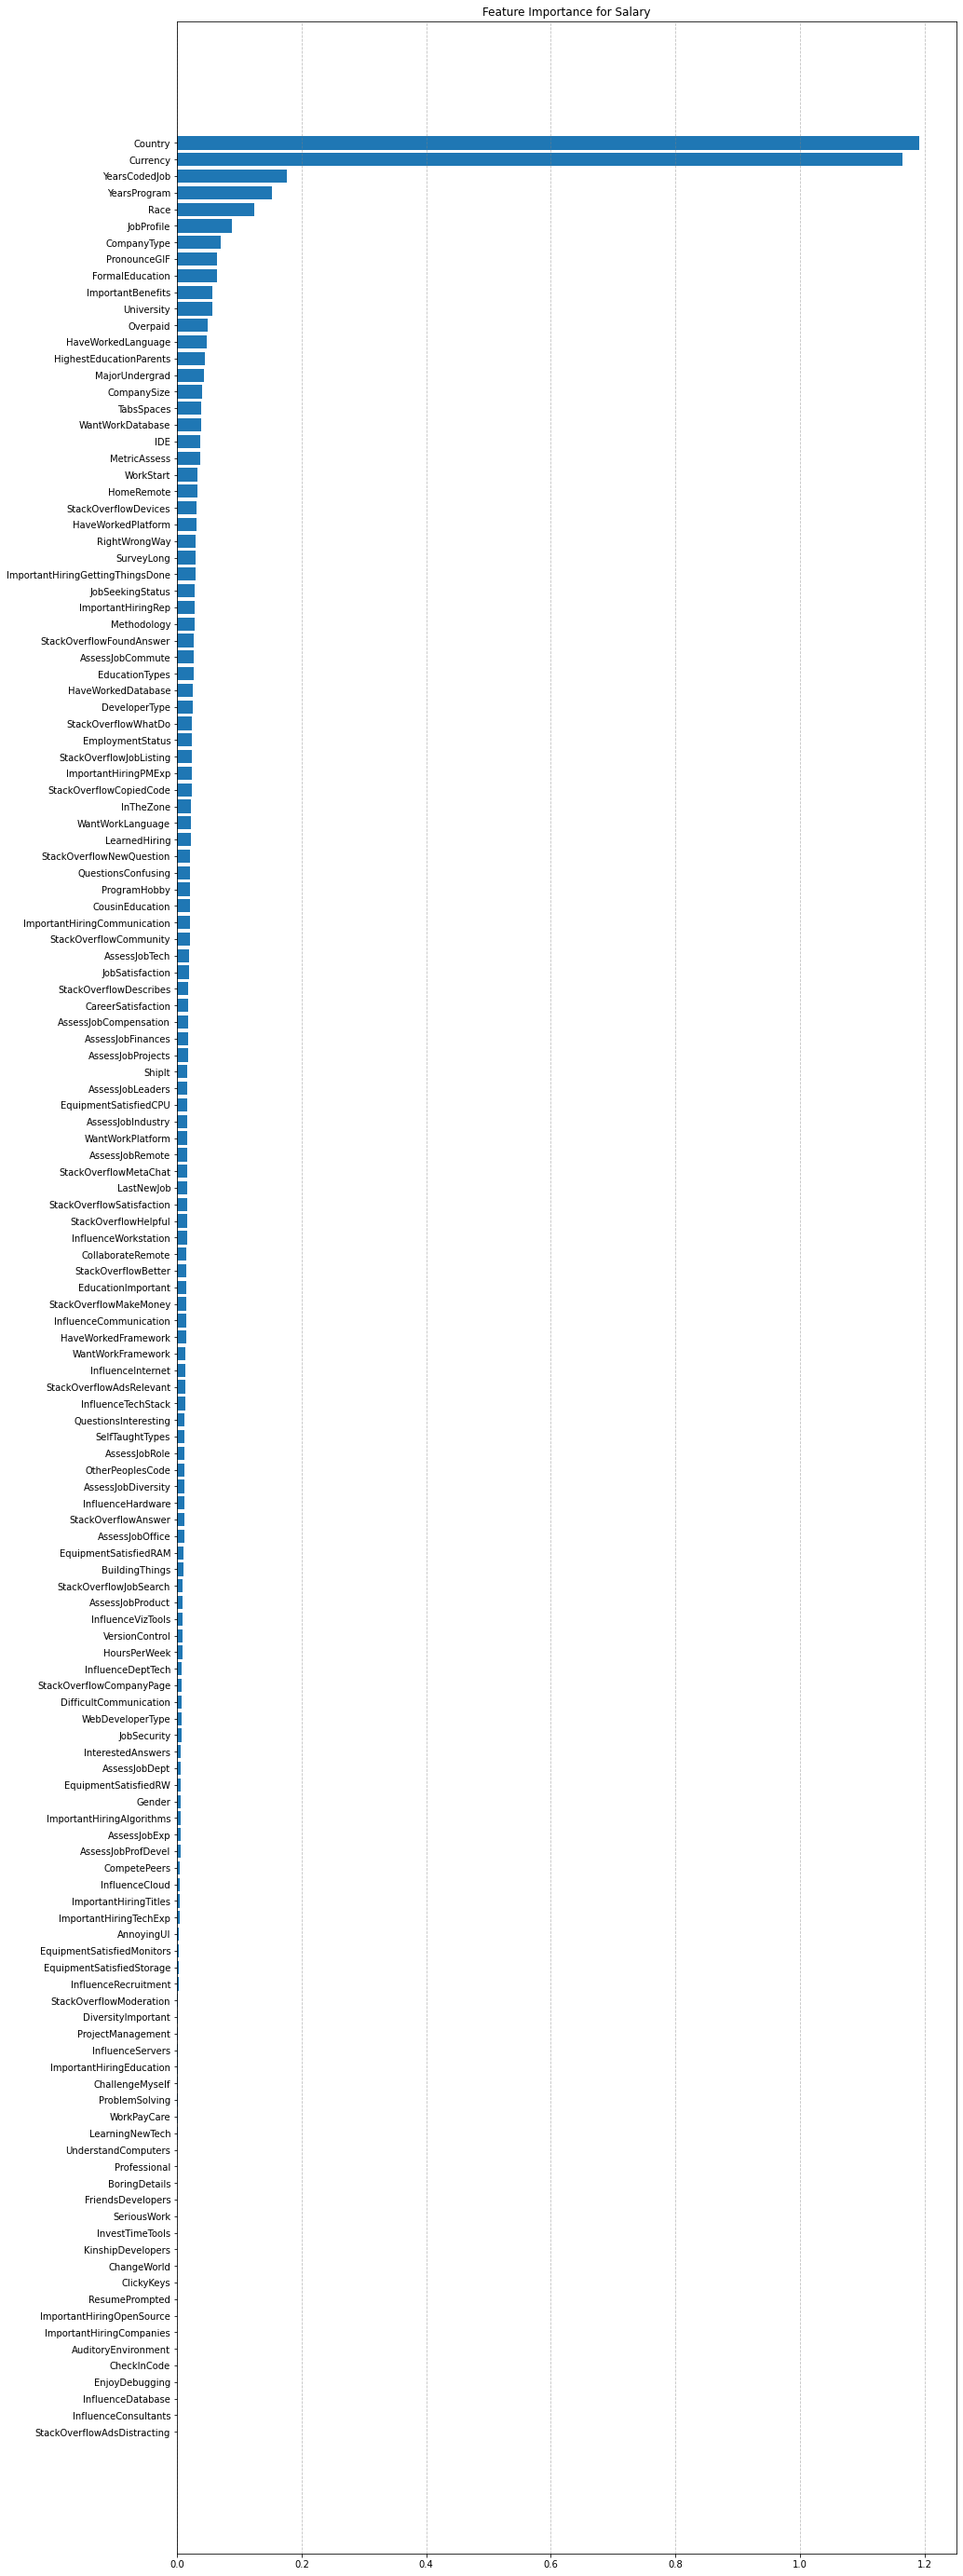

In [374]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,50))
plt.grid(True, axis='x', color='gray', alpha=0.5, linestyle='--')
plt.barh(*zip(*fs_score.items()))
plt.gca().invert_yaxis()
plt.title('Feature Importance for Salary')
plt.show()

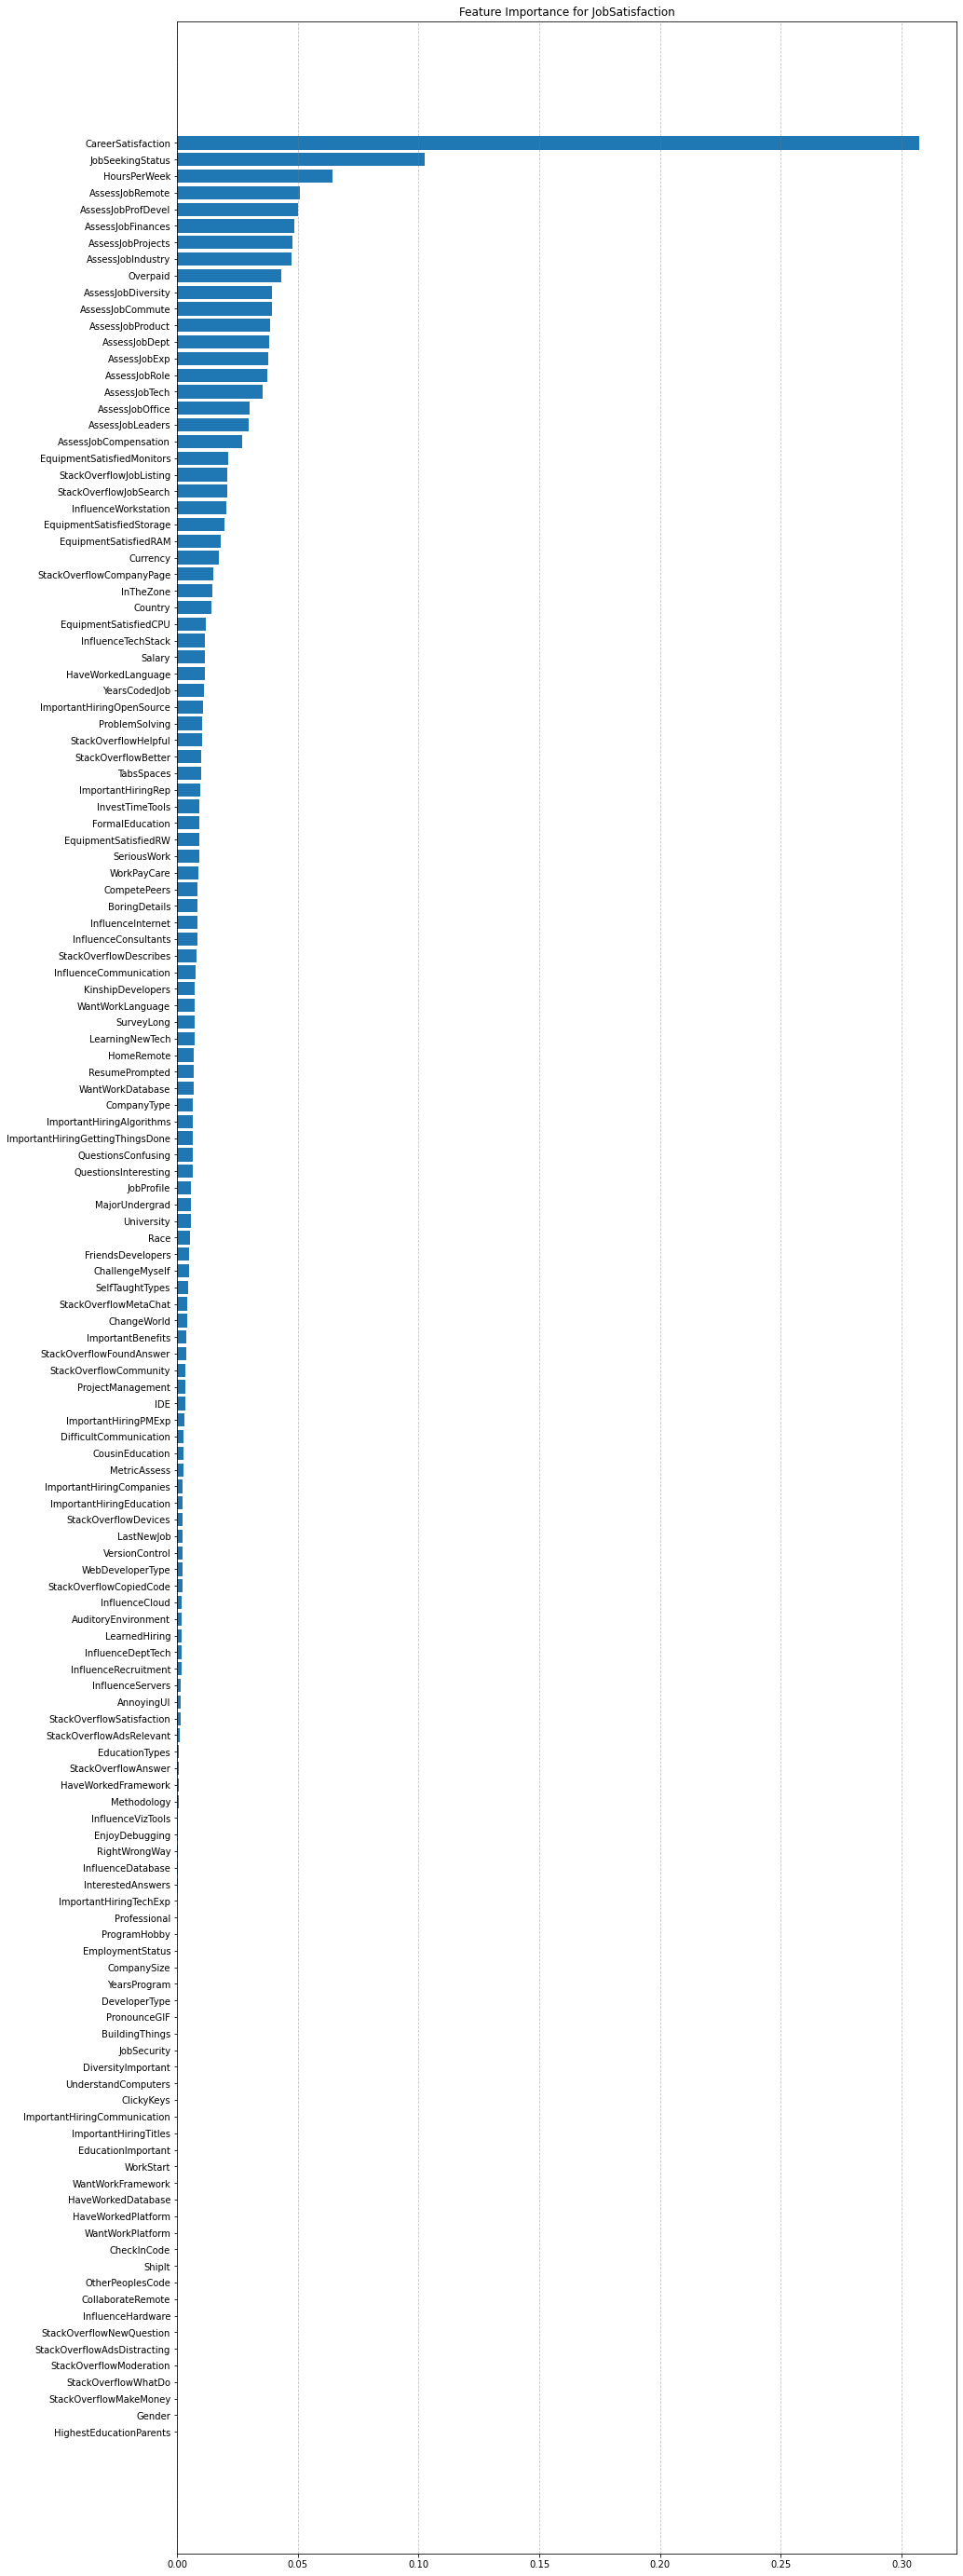

In [375]:
target = 'JobSatisfaction'
features = [x for x in new_df.columns if x != target]

x_data = new_df[features]
y_data = new_df[target]

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x_data, y_data)

fs_score = {}
for i, s in enumerate(fs.scores_):
    fs_score[x_data.columns[i]] = s
fs_score = {k:v for k,v in sorted(fs_score.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(15,50))
plt.grid(True, axis='x', color='gray', alpha=0.5, linestyle='--')
plt.barh(*zip(*fs_score.items()))
plt.gca().invert_yaxis()
plt.title(f'Feature Importance for {target}')
plt.show()